In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(11,8)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("imdb_top_1000.csv")

## Data Cleaning

In [3]:
data = df.copy()

In [4]:
# Drop unwanted colums
data.drop(["Poster_Link","Star2","Star3","Star4"],axis=1,inplace=True)

In [5]:
data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,689845,"4,360,000"


In [6]:
data.tail()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,No_of_Votes,Gross
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,43374,"30,500,000"
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,26471,NaN
999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,51853,NaN


In [7]:
data.shape

(1000, 12)

In [8]:
data.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'No_of_Votes', 'Gross'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  No_of_Votes    1000 non-null   int64  
 11  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [10]:
# Clean this colums 
# [ 'Released_Year', 'Runtime', 'Meta_score', 'Gross']

In [11]:
# check unique values in the colums and drop row 996
data.drop(966,axis=0,inplace=True)

In [12]:
# convert in to numeric 
data["Released_Year"] = pd.to_numeric(data["Released_Year"])

In [13]:
# clean runtime and convert in to int
data["Runtime"] = data["Runtime"].apply(lambda x:x.replace("min","")).astype(int)

In [14]:
# replace coma eith nothing and then convert data type in to float
data["Gross"] = data["Gross"].str.replace(",","").astype(float)

In [15]:
data[data.duplicated("Series_Title")]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,No_of_Votes,Gross
136,Drishyam,2015,UA,163,"Crime, Drama, Mystery",8.2,Desperate measures are taken by a man who trie...,NaN,Nishikant Kamat,Ajay Devgn,70367,739478.0


In [16]:
# drop duplecet values
data.drop_duplicates("Series_Title",keep="first",inplace=True)

In [17]:
data.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       156
Director           0
Star1              0
No_of_Votes        0
Gross            169
dtype: int64

In [18]:
# handel null values
data["Certificate"] = data["Certificate"].fillna("U")
data["Meta_score"] = data["Meta_score"].fillna(79.0)
data["Gross"] = data["Gross"].fillna(316735195.0)

In [40]:
# replace all nan vues
data.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
No_of_Votes      0
Gross            0
dtype: int64

In [43]:
one = OneHotEncoder()

In [49]:
one.fit_transform(data[["Series_Title"]]).toarray(columns=one.get_feature_names())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## EDA

In [55]:
data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,2343110,28341469.0
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,1620367,134966411.0
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,689845,4360000.0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   998 non-null    object 
 1   Released_Year  998 non-null    int64  
 2   Certificate    998 non-null    object 
 3   Runtime        998 non-null    int32  
 4   Genre          998 non-null    object 
 5   IMDB_Rating    998 non-null    float64
 6   Overview       998 non-null    object 
 7   Meta_score     998 non-null    float64
 8   Director       998 non-null    object 
 9   Star1          998 non-null    object 
 10  No_of_Votes    998 non-null    int64  
 11  Gross          998 non-null    float64
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 97.5+ KB


In [57]:
data.shape

(998, 12)

In [62]:
catigorical_features = data.dtypes[data.dtypes == "object"].index

In [63]:
catigorical_features

Index(['Series_Title', 'Certificate', 'Genre', 'Overview', 'Director',
       'Star1'],
      dtype='object')

In [64]:
numerical_features = data.dtypes[data.dtypes != "object"].index

In [65]:
numerical_features

Index(['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes',
       'Gross'],
      dtype='object')

In [67]:
for i in catigorical_features:
    print(i,data[i].value_counts(normalize=True)*100)
    print("="*80)

Series_Title The Shawshank Redemption       0.1002
Awakenings                     0.1002
What's Eating Gilbert Grape    0.1002
Tombstone                      0.1002
The Sandlot                    0.1002
                                ...  
The Imitation Game             0.1002
Guardians of the Galaxy        0.1002
Blade Runner 2049              0.1002
Her                            0.1002
The 39 Steps                   0.1002
Name: Series_Title, Length: 998, dtype: float64
Certificate U           33.466934
A           19.739479
UA          17.434870
R           14.629259
PG-13        4.308617
PG           3.707415
Passed       3.406814
G            1.202405
Approved     1.102204
TV-PG        0.300601
GP           0.200401
TV-14        0.100200
16           0.100200
TV-MA        0.100200
Unrated      0.100200
U/A          0.100200
Name: Certificate, dtype: float64
Genre Drama                        8.517034
Drama, Romance               3.707415
Comedy, Drama                3.507014
Com

Index(['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes',
       'Gross'],
      dtype='object')


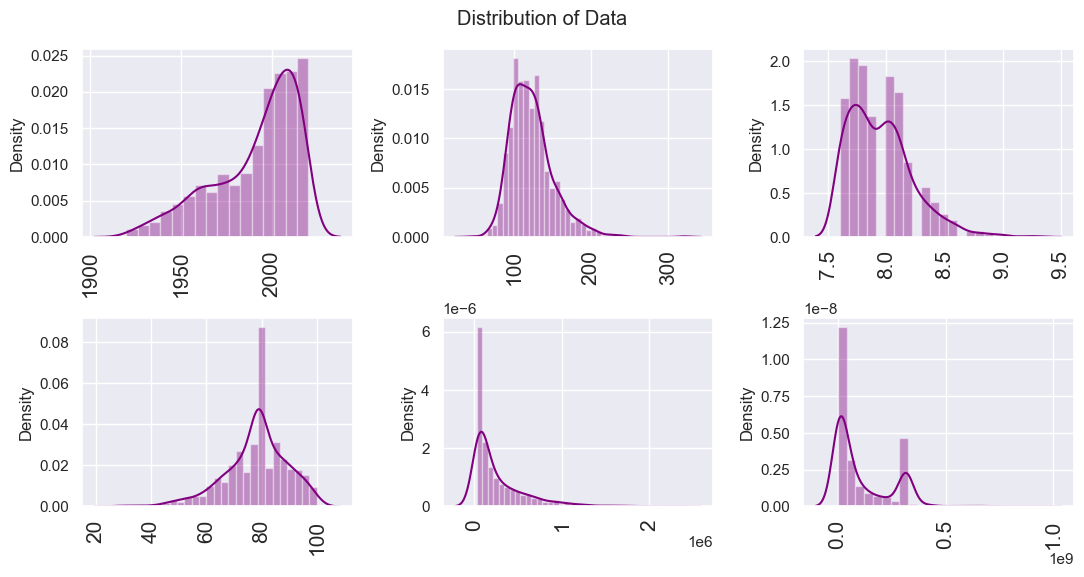

In [81]:
print(numerical_features)
try:
    plt.suptitle("Distribution of Data")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,3,i+1)
        sns.distplot(x= data[numerical_features[i]],color="purple")
        plt.xticks(size=15,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)

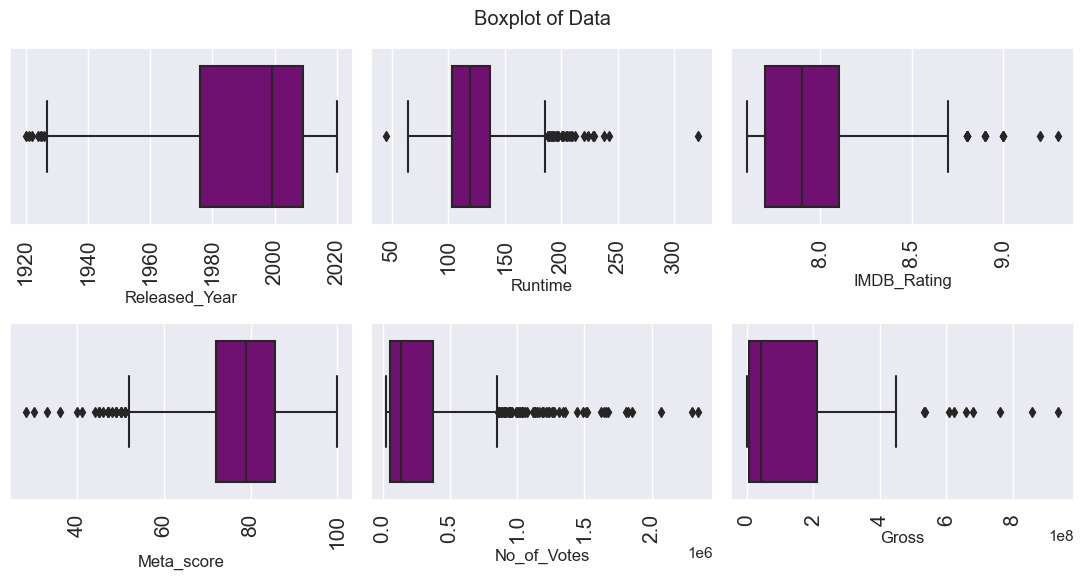

In [83]:
try:
    plt.suptitle("Boxplot of Data")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,3,i+1)
        sns.boxplot(x= data[numerical_features[i]],color="purple")
        plt.xticks(size=15,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)

<AxesSubplot:>

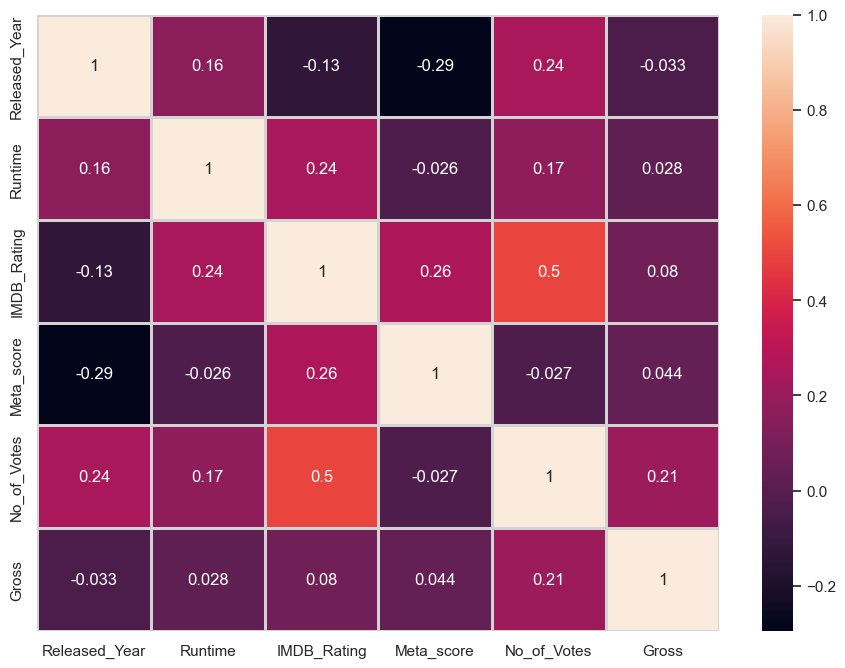

In [87]:
# check corr relation vith each other
sns.heatmap(data.corr(),annot = True, linewidths = 2, linecolor = 'lightgrey')

In [102]:
year_gross = data.groupby("Released_Year")["Gross"].sum().sort_values(ascending=False).reset_index()

In [103]:
year_gross

,Released_Year,Gross
0,2019,4.623889e+09
1,2009,4.204111e+09
2,2018,4.191433e+09
3,2016,4.179233e+09
4,2012,3.492822e+09
...,...,...
94,1927,1.775706e+06
95,1926,1.033895e+06
96,1924,9.773750e+05
97,1937,1.728850e+05


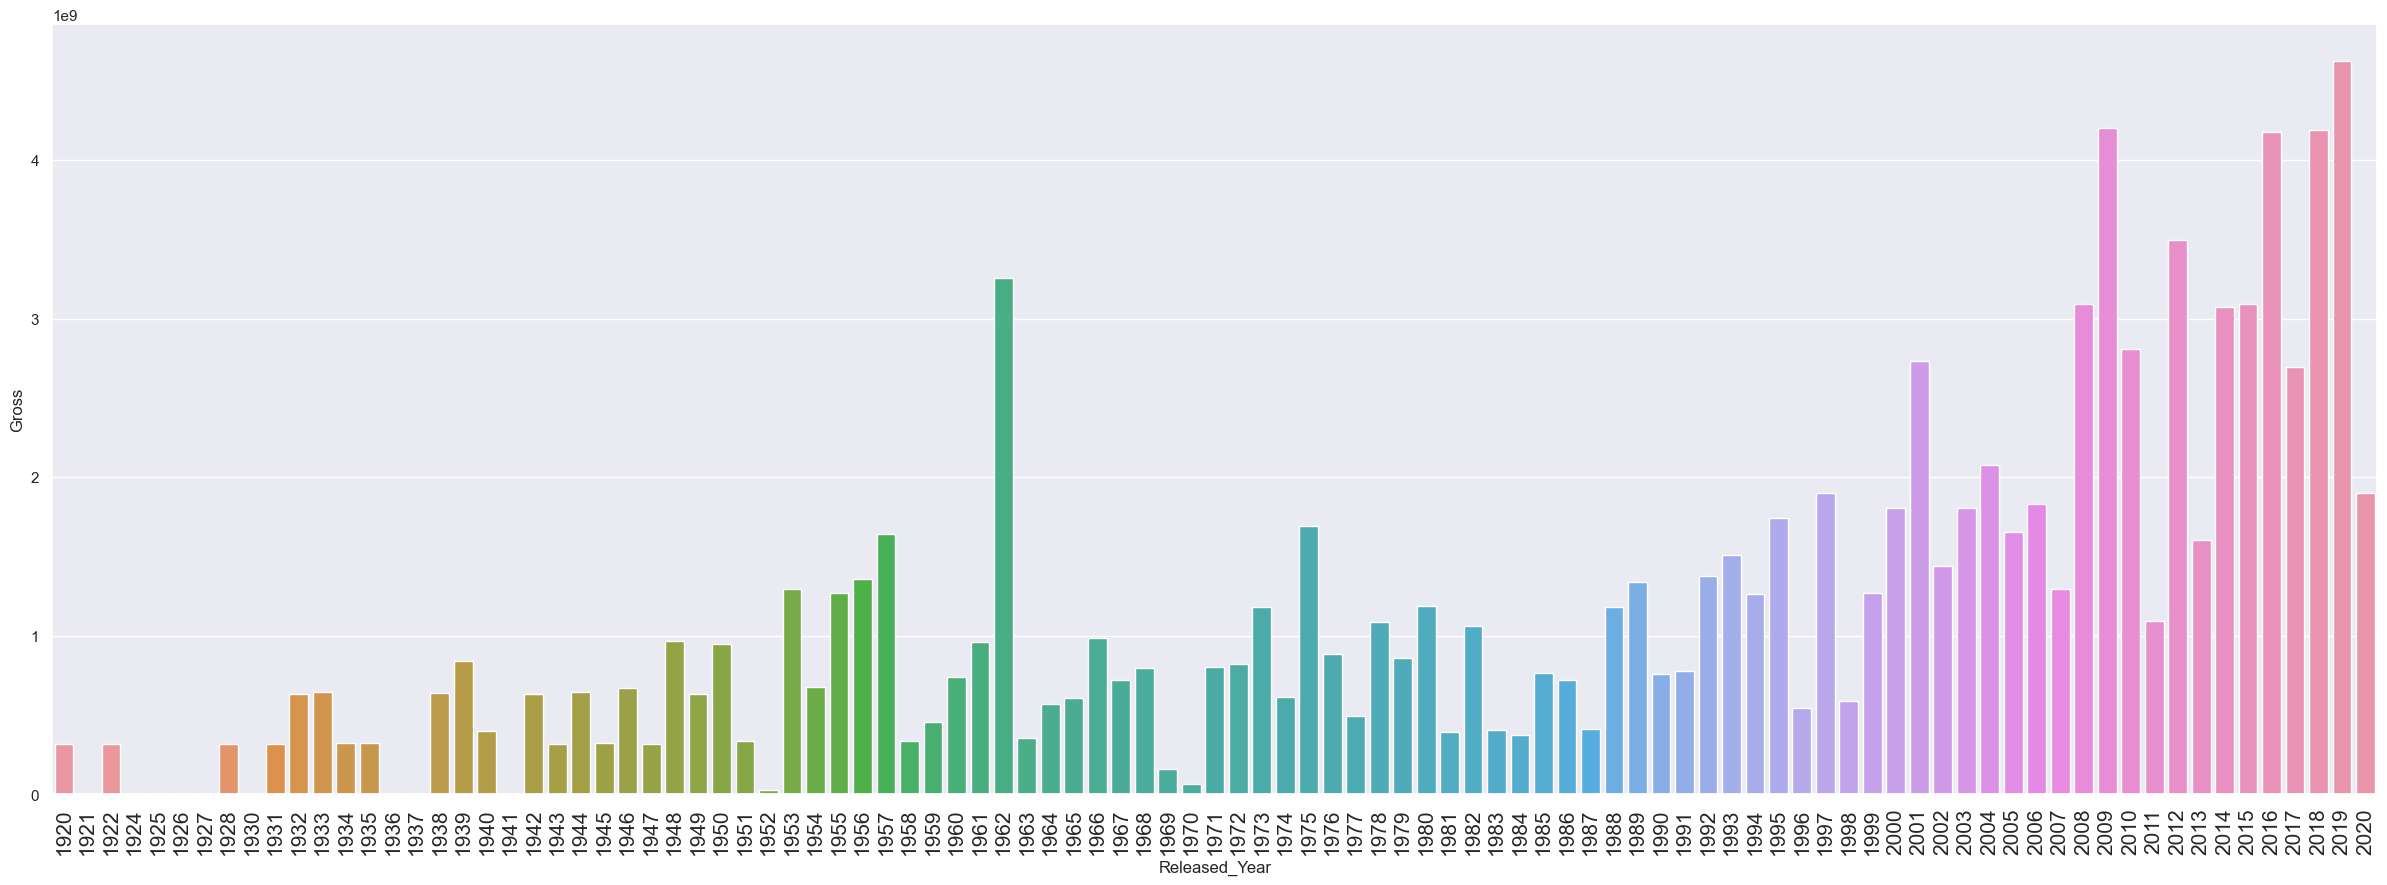

In [115]:
plt.figure(figsize=(30,10))
sns.barplot(y="Gross",x="Released_Year",data=year_gross)
plt.xticks(size=15,rotation=90)
plt.show()

<AxesSubplot:ylabel='Gross'>

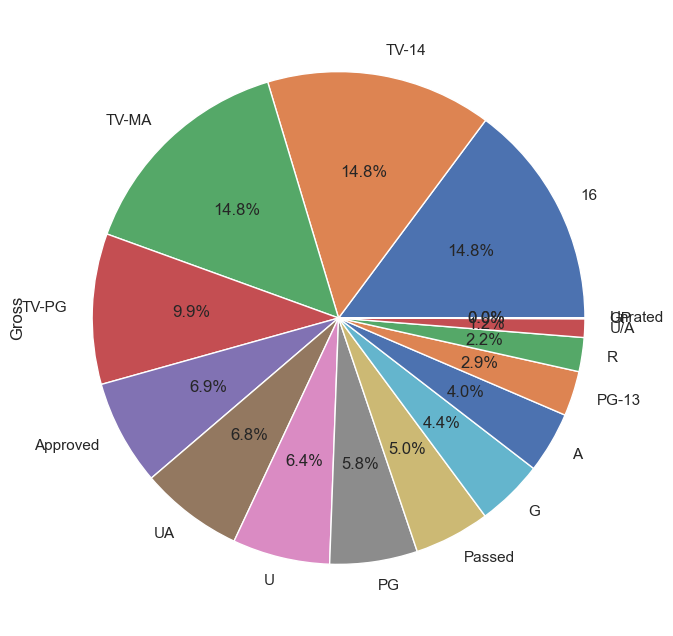

In [128]:
# certification and there gross
data.groupby("Certificate")["Gross"].mean().sort_values(ascending=False).plot.pie(autopct="%1.1f%%")

In [133]:
# top 10 gener voted higest
top10votes = data.groupby("Genre")["No_of_Votes"].sum().sort_values(ascending=False).reset_index().head(10)

In [134]:
top10votes

,Genre,No_of_Votes
0,Drama,17720455
1,"Action, Adventure, Sci-Fi",14635798
2,"Crime, Drama",10655273
3,"Animation, Adventure, Comedy",9894322
4,"Crime, Drama, Thriller",9769403
5,"Action, Adventure, Drama",9295859
6,"Drama, Romance",9038356
7,"Action, Crime, Drama",8520797
8,"Crime, Drama, Mystery",6868171
9,"Biography, Drama, History",6809363


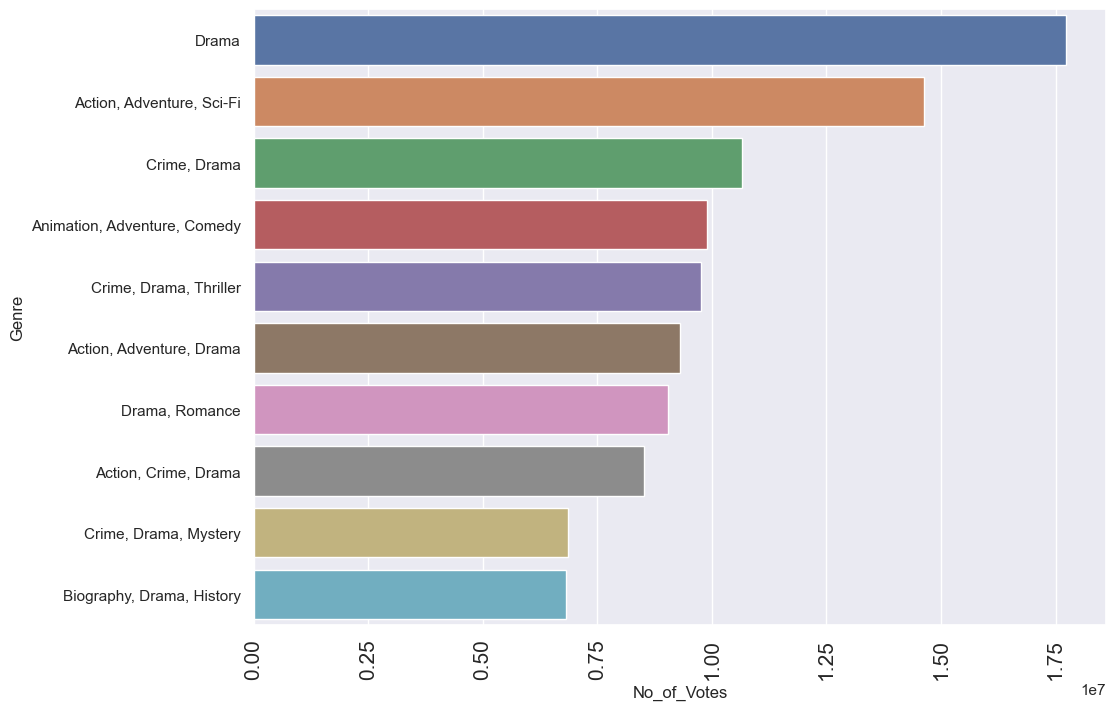

In [137]:
sns.barplot(y="Genre",x="No_of_Votes",data=top10votes)
plt.xticks(size=15,rotation=90)
plt.show()

In [143]:
top20movies =  data.groupby("Series_Title")["No_of_Votes"].sum().sort_values(ascending=False).reset_index().head(20)

In [144]:
top20movies

,Series_Title,No_of_Votes
0,The Shawshank Redemption,2343110
1,The Dark Knight,2303232
2,Inception,2067042
3,Fight Club,1854740
4,Pulp Fiction,1826188
5,Forrest Gump,1809221
6,The Matrix,1676426
7,The Lord of the Rings: The Fellowship of the Ring,1661481
8,The Lord of the Rings: The Return of the King,1642758
9,The Godfather,1620367


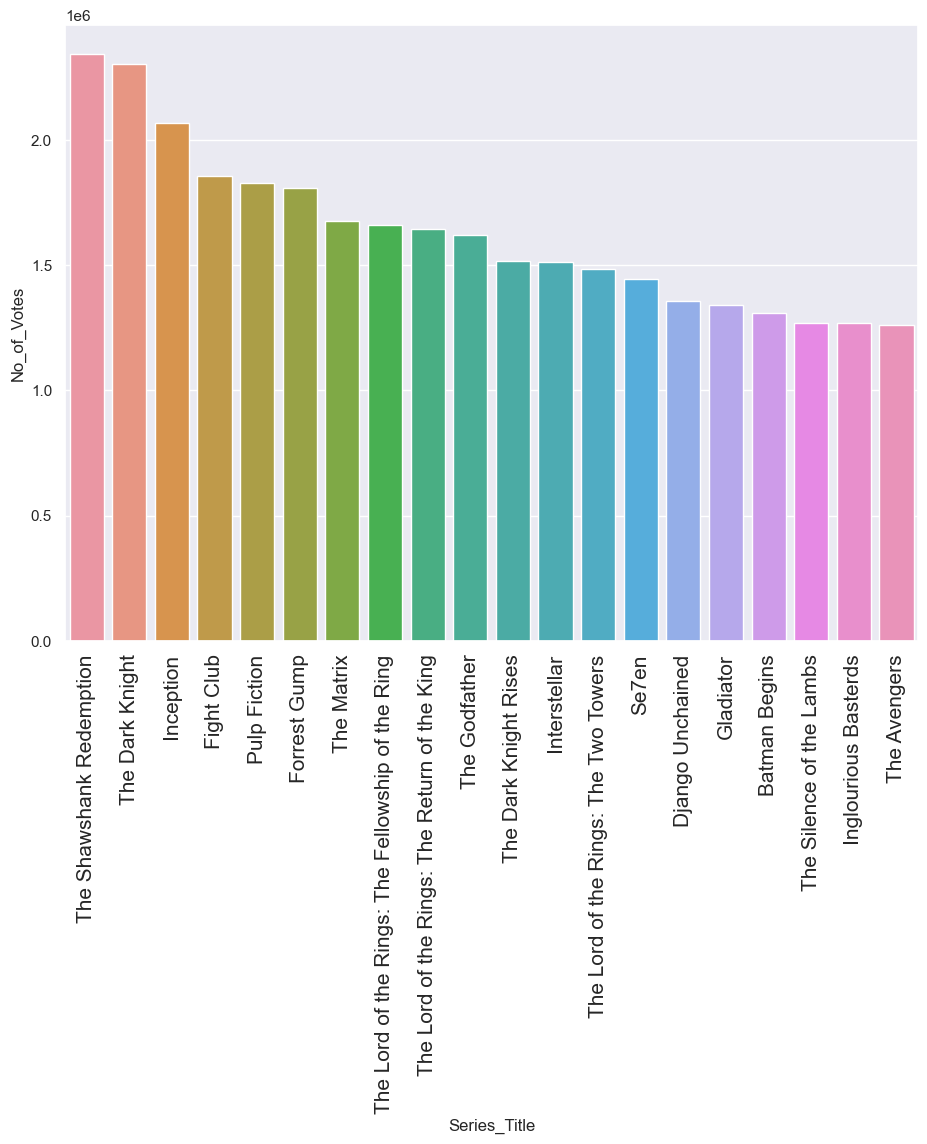

In [146]:
# Top 20 movies by votings
sns.barplot(y="No_of_Votes",x="Series_Title",data=top20movies)
plt.xticks(size=15,rotation=90)
plt.show()

In [156]:
imdb_ratings = data.groupby("Series_Title")["IMDB_Rating"].sum().sort_values(ascending=False).reset_index().head(20)

In [157]:
imdb_ratings

,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,12 Angry Men,9.0
3,The Godfather: Part II,9.0
4,The Dark Knight,9.0
5,Pulp Fiction,8.9
6,The Lord of the Rings: The Return of the King,8.9
7,Schindler's List,8.9
8,The Lord of the Rings: The Fellowship of the Ring,8.8
9,Forrest Gump,8.8


<AxesSubplot:xlabel='IMDB_Rating', ylabel='Series_Title'>

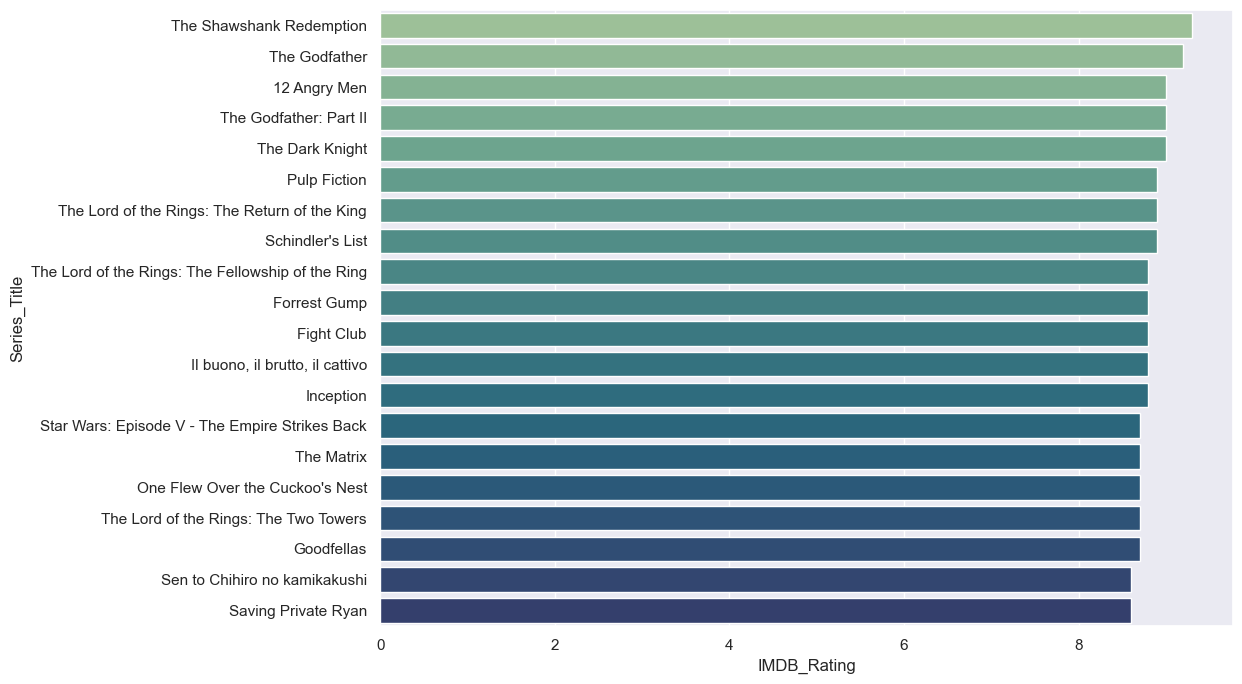

In [158]:
sns.barplot(x="IMDB_Rating",y="Series_Title",data=imdb_ratings,palette = 'crest')

In [162]:
top5_movie_Gross = data.groupby("Series_Title")["Gross"].sum().sort_values(ascending=False).reset_index().head(5)

In [163]:
top5_movie_Gross

,Series_Title,Gross
0,Star Wars: Episode VII - The Force Awakens,936662225.0
1,Avengers: Endgame,858373000.0
2,Avatar,760507625.0
3,Avengers: Infinity War,678815482.0
4,Titanic,659325379.0


<AxesSubplot:xlabel='Series_Title', ylabel='Gross'>

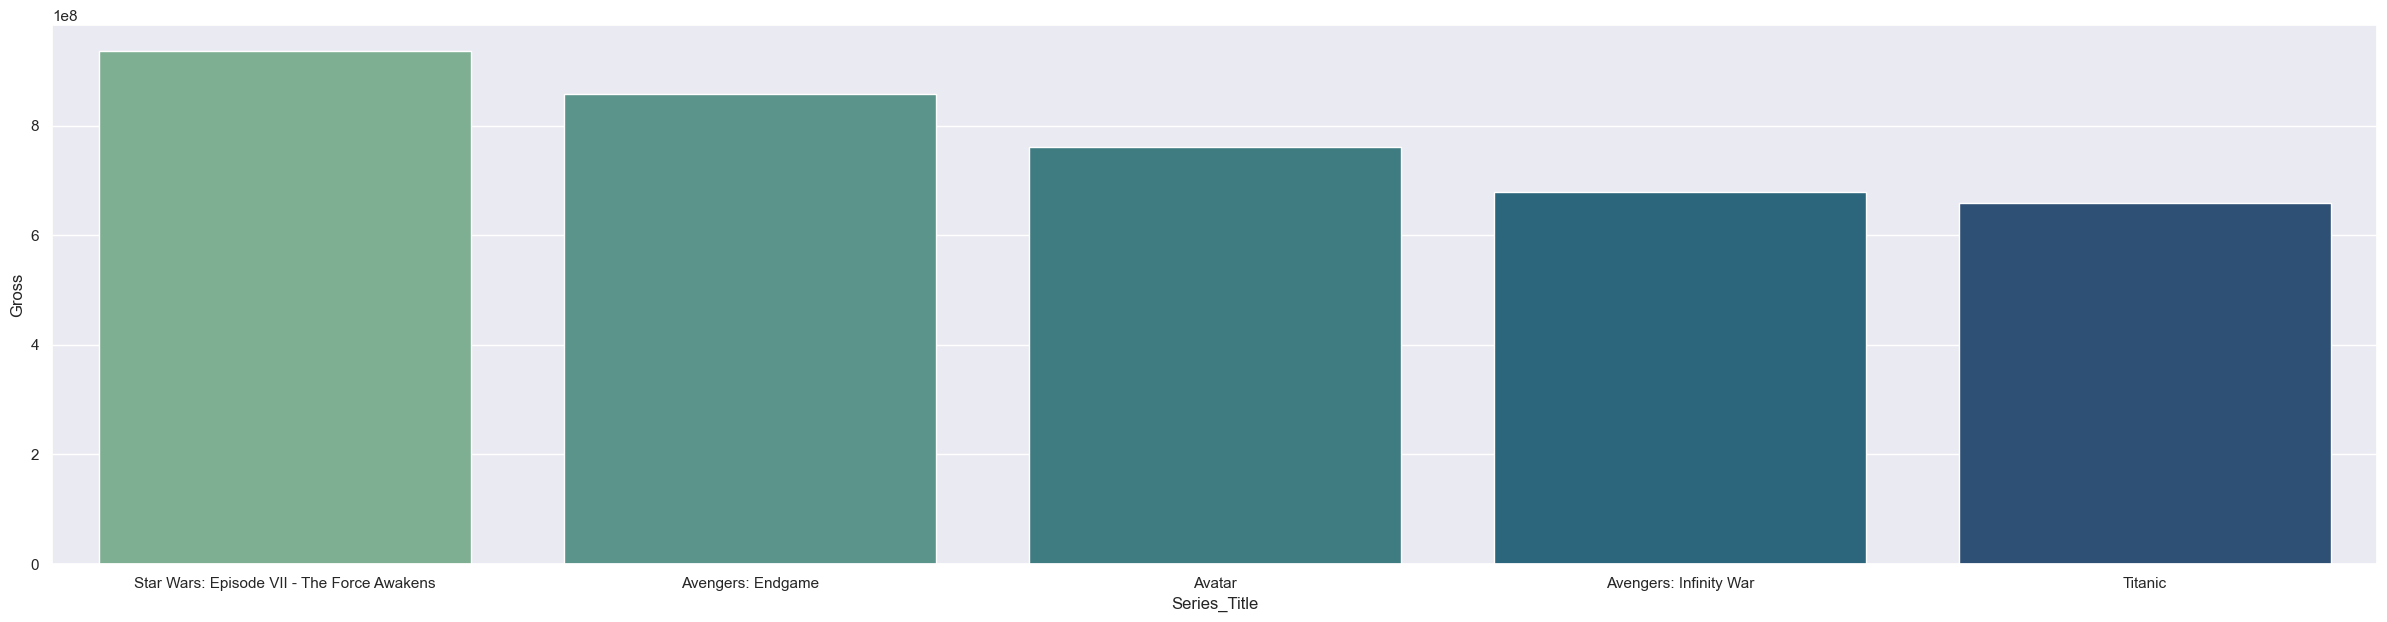

In [167]:
plt.figure(figsize=(30,7))
sns.barplot(x="Series_Title",y="Gross",data=top5_movie_Gross,palette = 'crest')

In [170]:
top8directorsGross = data.groupby("Director")["Gross"].sum().sort_values(ascending=False).reset_index().head(8)

In [171]:
top8directorsGross

,Director,Gross
0,Steven Spielberg,2.478133e+09
1,Anthony Russo,2.205039e+09
2,Christopher Nolan,1.937454e+09
3,Akira Kurosawa,1.904968e+09
4,James Cameron,1.748237e+09
5,Alfred Hitchcock,1.702785e+09
6,Peter Jackson,1.597312e+09
7,J.J. Abrams,1.423171e+09


<AxesSubplot:xlabel='Gross', ylabel='Director'>

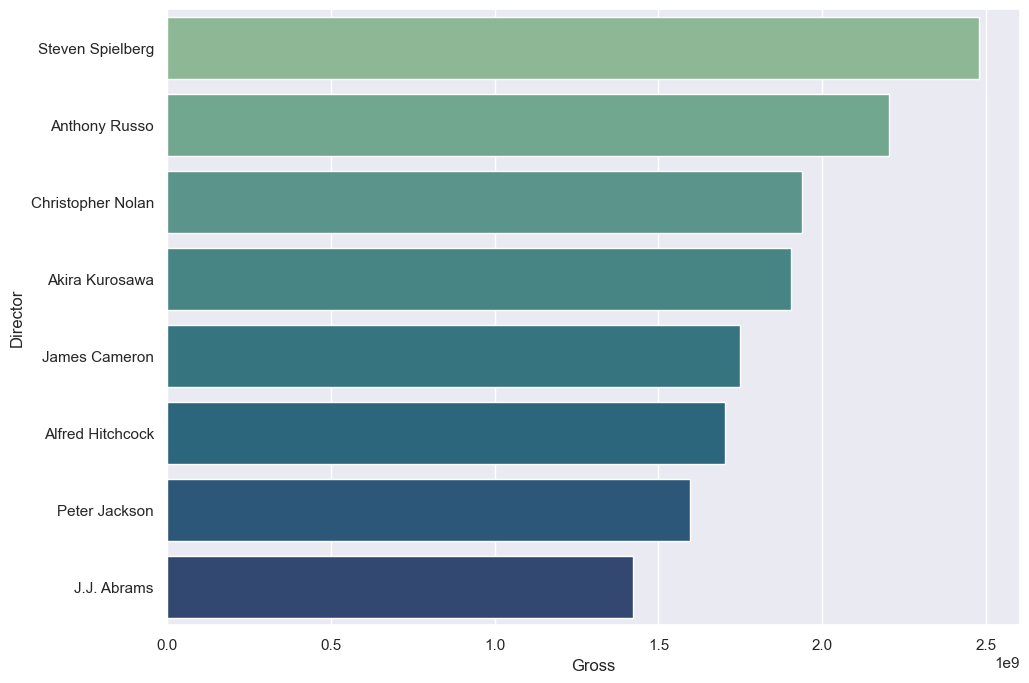

In [177]:
sns.barplot(x="Gross",y="Director",data=top8directorsGross,palette = 'crest')

In [182]:
starsgross = data.groupby("Star1")["Gross"].sum().sort_values(ascending=False).reset_index().head(10)

In [183]:
starsgross

,Star1,Gross
0,Tom Hanks,2.319260e+09
1,Joe Russo,2.205039e+09
2,Leonardo DiCaprio,1.877322e+09
3,Daniel Radcliffe,1.835901e+09
4,Toshirô Mifune,1.584042e+09
5,Christian Bale,1.351591e+09
6,James Stewart,1.328405e+09
7,Humphrey Bogart,1.282164e+09
8,Robert Downey Jr.,1.150720e+09
9,Elijah Wood,1.035942e+09


<AxesSubplot:xlabel='Star1', ylabel='Gross'>

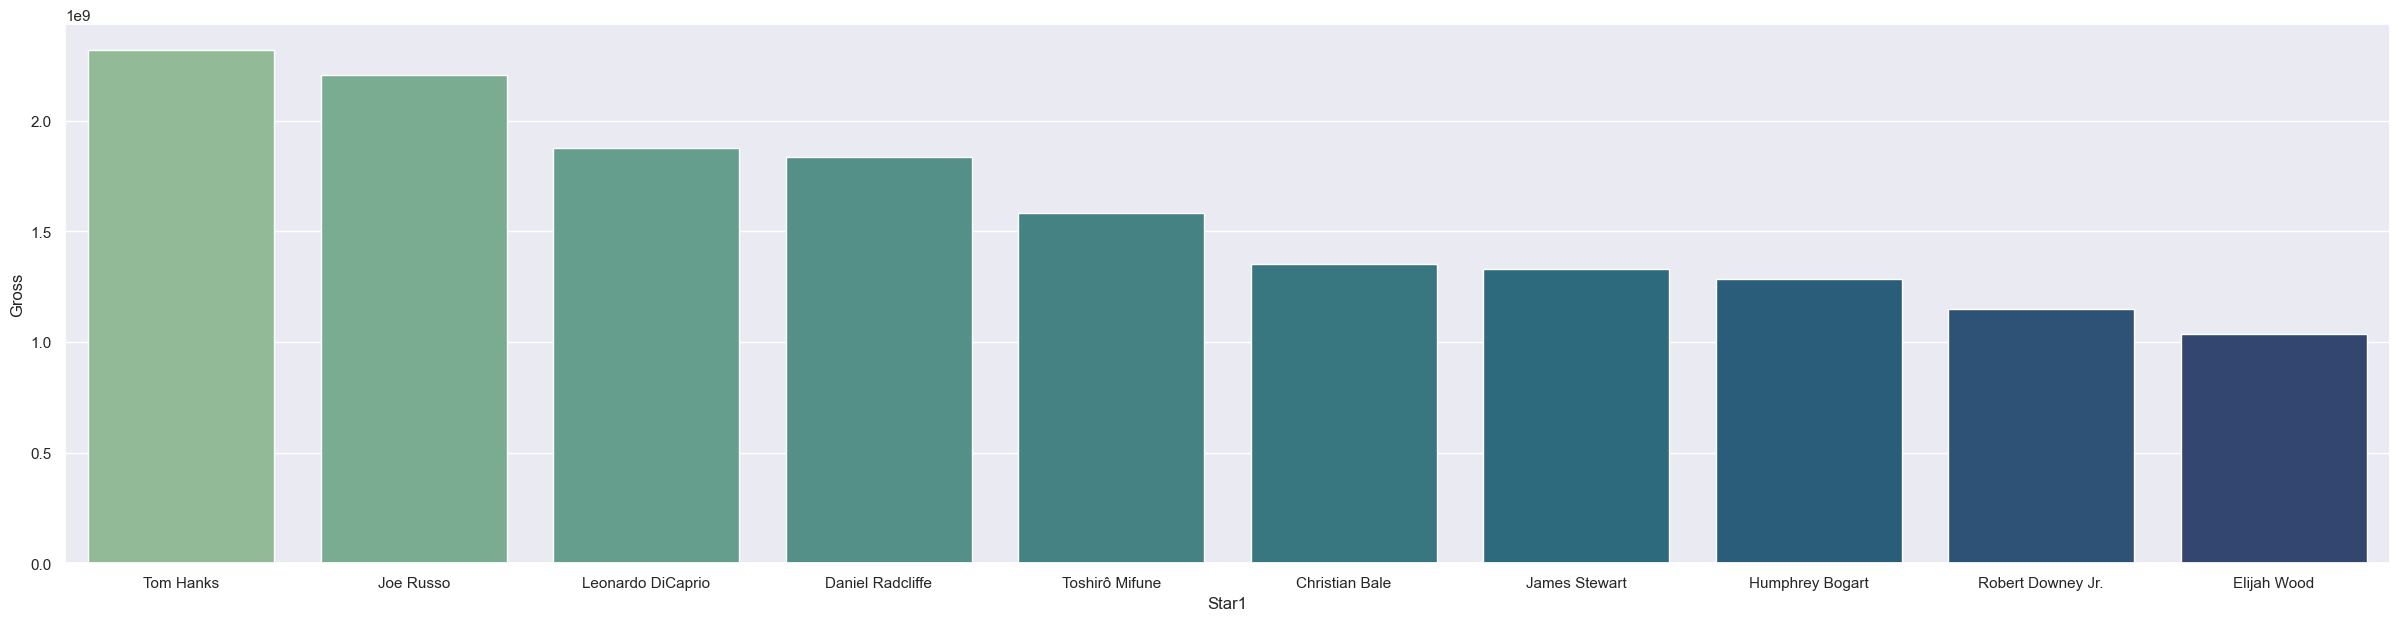

In [186]:
plt.figure(figsize=(30,7))
sns.barplot(x="Star1",y="Gross",data=starsgross,palette = 'crest')

In [190]:
longest_movies = data.groupby("Series_Title")["Runtime"].sum().sort_values(ascending=False).reset_index().head(10)

In [191]:
longest_movies

,Series_Title,Runtime
0,Gangs of Wasseypur,321
1,Hamlet,242
2,Gone with the Wind,238
3,Once Upon a Time in America,229
4,Lawrence of Arabia,228
5,Lagaan: Once Upon a Time in India,224
6,The Ten Commandments,220
7,Ben-Hur,212
8,"Swades: We, the People",210
9,The Irishman,209


<AxesSubplot:xlabel='Series_Title', ylabel='Runtime'>

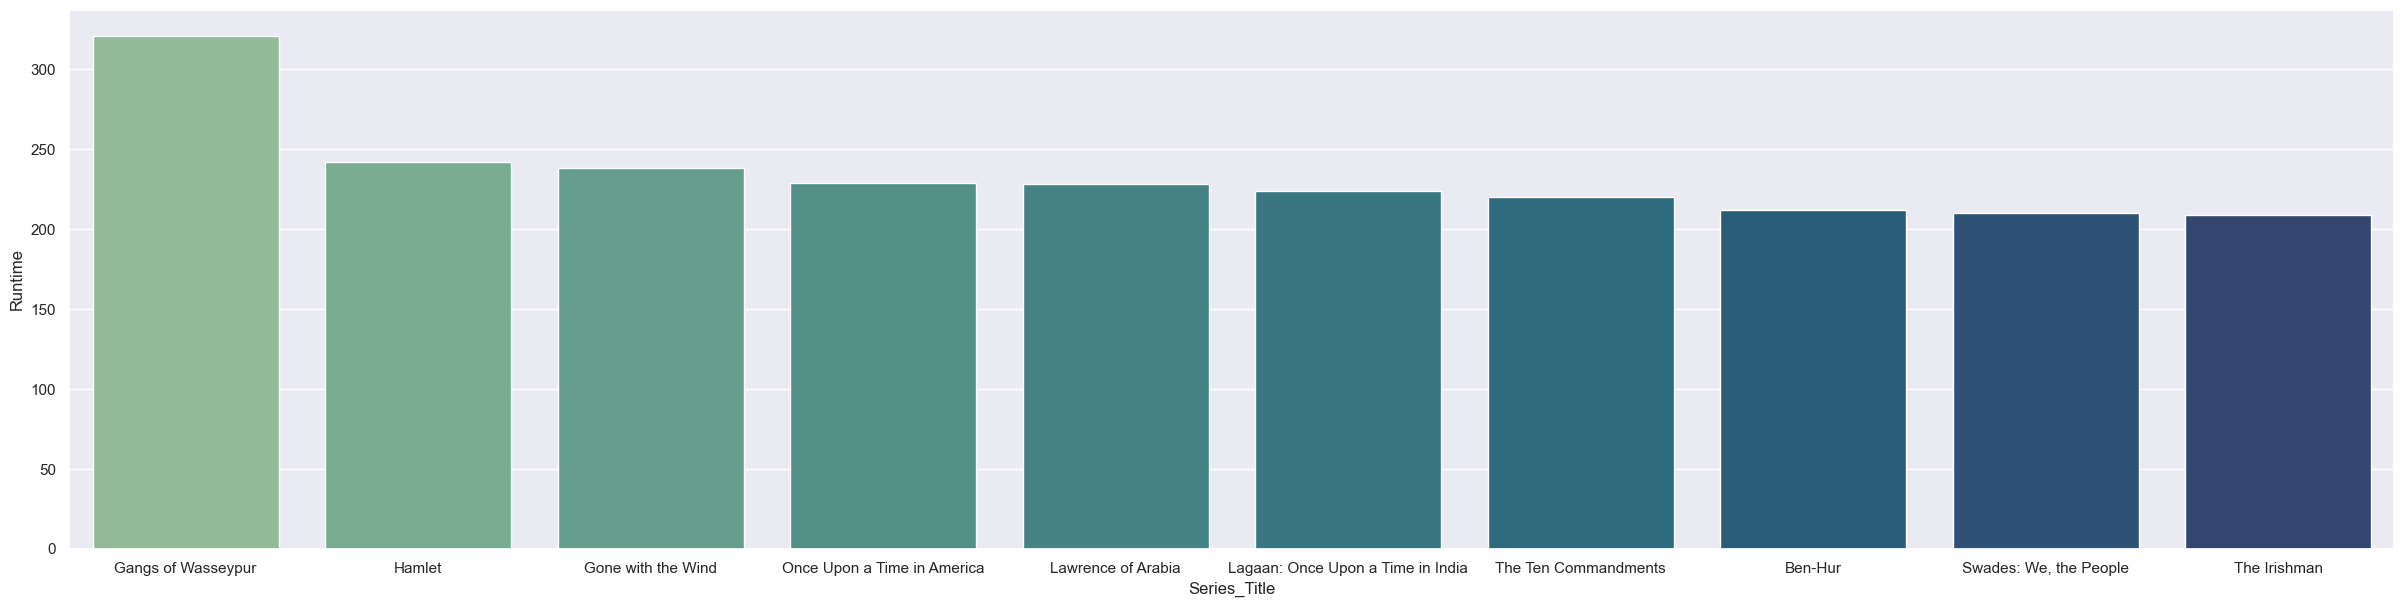

In [199]:
plt.figure(figsize=(30,7))
sns.barplot(x="Series_Title",y="Runtime",data=longest_movies,palette = 'crest')